### Student Information
Name: Samuel Perez

Student ID: 107065434

GitHub ID: perezsam

---

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 

In [5]:
### Begin Assignment Here

In [ ]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

## 1. Take Home Exercises

In [7]:
# import libraries
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
%matplotlib inline

from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

# data visualization libraries
import matplotlib.pyplot as plt
from plotly import tools
import seaborn as sns
from mpl_toolkits import mplot3d
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#import plotly.graph_objects as go
#from plotly.subplots import make_subplots

# Dimensionality Reduction
from sklearn.decomposition import PCA

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats.stats import pearsonr
from sklearn.naive_bayes import MultinomialNB


##---Take home excercises setup---#
# prepare dataset
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

## Excercise 2:
Experiment with other querying techniques using pandas dataframes.


In [8]:
#query the first 15 records where categry is either 1, 2 or 3
X.query('(category == [1, 2, 3])')[0:15] 

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


## Excercise 5:
Please check the data and the process below, describe what you observe and why it happened.
$Hint$ : why .isnull() didn't work?

In [9]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                            },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [10]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [ ]:
# Answer here
'''
DataFrame.isnull(self) method will only return True if a value is missing, 
NA values, such as None or numpy.NaN, gets mapped to True values. Everything else gets mapped to False values.

In this case the explicity declared strings 'NaN', 'None' and empty string '' are evaluated as False because the method 
has no way of knowing what is the value inside the string.

'''

### Exercise 6:

In [11]:
X_sample = X.sample(n=1000) #random state

In [12]:
len(X_sample)

1000

In [13]:
X_sample[0:4]

,text,category,category_name
531,From: ch381@cleveland.Freenet.Edu (James K. Bl...,1,comp.graphics
44,From: rgasch@nl.oracle.com (Robert Gasch) Subj...,2,sci.med
2205,From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden) ...,3,soc.religion.christian
1206,From: wagner@grace.math.uh.edu (David Wagner) ...,3,soc.religion.christian


Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [ ]:
# Answer here

'''
Our original data set X is not affected when using the DataFrame.sample() method.
The method only creates a copy of ramdomly selected items which then is assigned to the X_sample.

Since the samples are taken randomly, the method doesn't ensure sorting. If we want to sort in 
ascending order we can do X_sample.sort_index().
'''

### Exercise 8:
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise.

AxesSubplot(0.125,0.125;0.775x0.755)


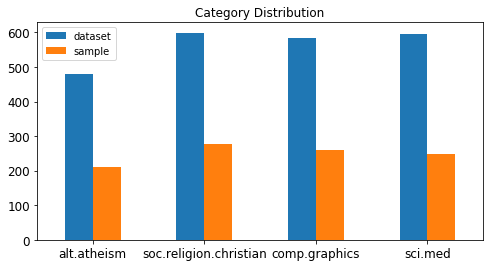

In [14]:
# Answer here
sample_counts = X_sample.category_name.value_counts()
actual_counts = X.category_name.value_counts()

combined_data_frame = pd.DataFrame({'dataset': actual_counts,
                    'sample': sample_counts}, index = categories)

print(combined_data_frame.plot.bar(title = 'Category Distribution', rot = 0, fontsize = 12, figsize = (8,4)))

#### Exercise 10:
We said that the 1 at the beginning of the fifth record represents the 00 term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [15]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [16]:
# Answer here
array = X_counts[4:5, 0:100].toarray() #obtain the fifth record

'''
We can print all the words contained in the sentence from the first 100 words, 
the second word printed correspond to the second 1 in the array

'''

for word in count_vect.inverse_transform(array)[0]:
    print('word: %s' % word)

word: 00
word: 01


### Exercise 11:

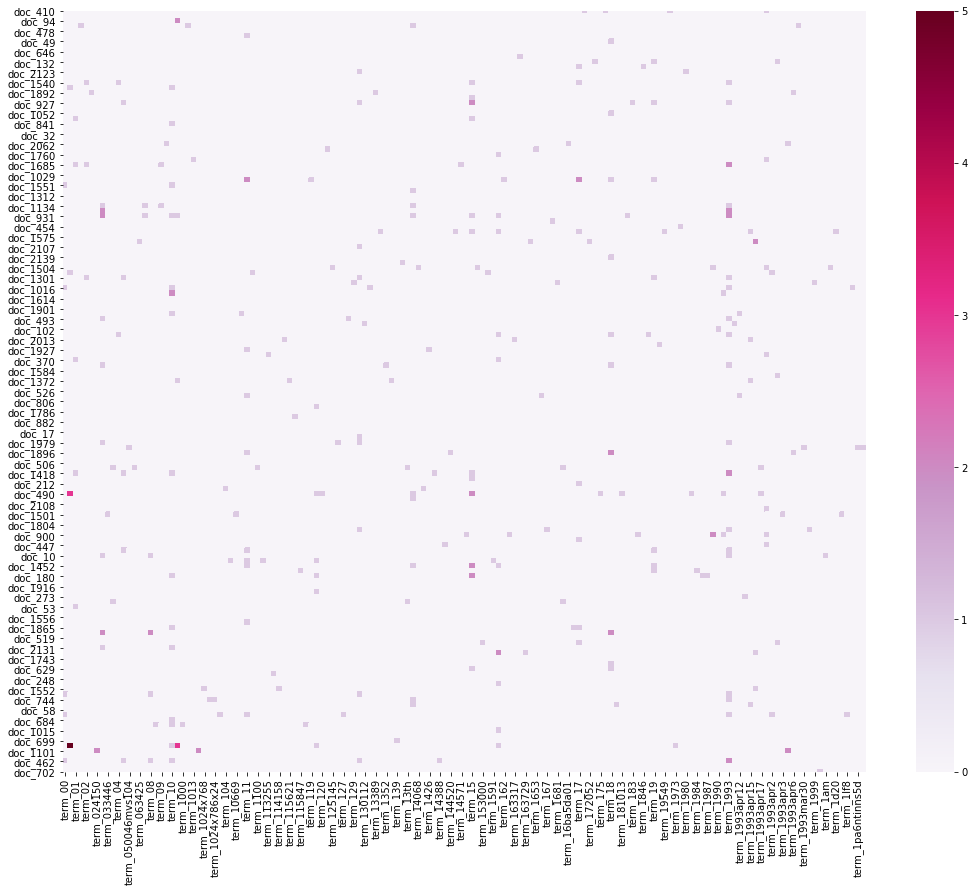

In [17]:
# Answer here

'''
We can use a sample of the whole documents to create a smaller term-document matrix which we can plot to observe some terms 
that are more repeated than others.

We can also remove the vmax to be able to show different colors for different values in the term-document matrix and remove the
number labels inside the heatmap to make it less cluttered

'''
n = 150
sample_X = X.sample(n=n, random_state = 26)
sample_count_vect = CountVectorizer()
sample_counts = sample_count_vect.fit_transform(sample_X.text)
plot_x = ["term_"+str(i) for i in sample_count_vect.get_feature_names()[0:n]]

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(sample_X.index)[:n]]
plot_z = sample_counts[0:n, 0:n].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(18, 14))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, annot=False)

### Exercise 12 :
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

Dimension:
(2257, 3)


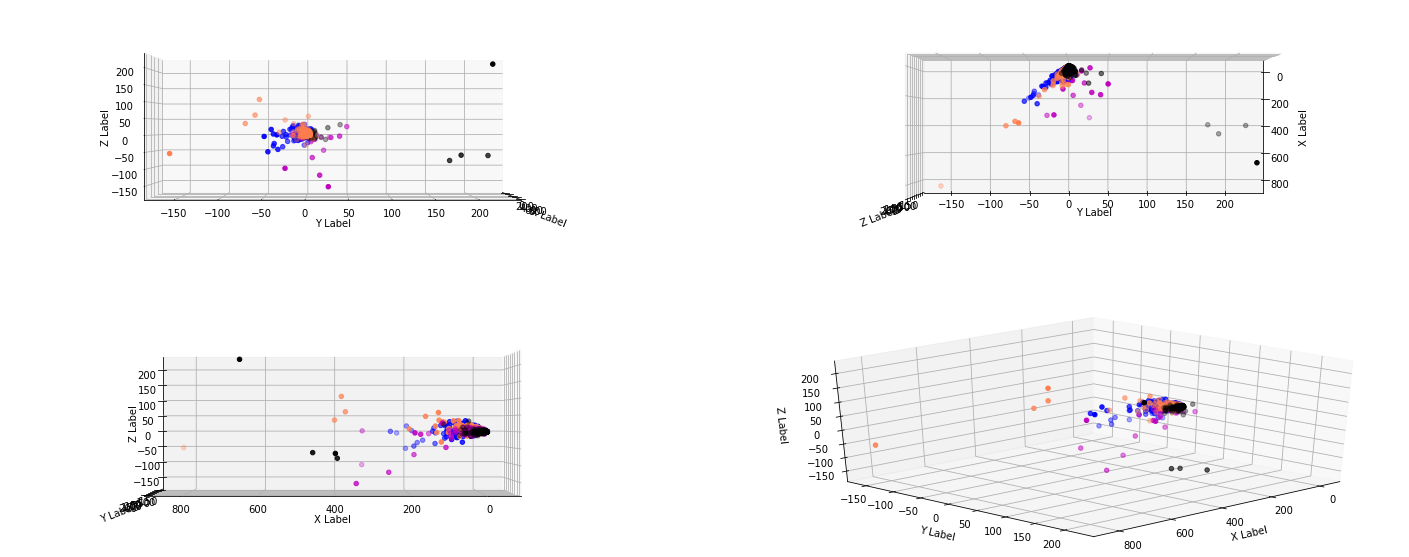

In [18]:
# Answer here
X_reduced3 = PCA(n_components = 3).fit_transform(X_counts.toarray())
print('Dimension:')
print(X_reduced3.shape)

col = ['coral', 'blue', 'black', 'm']
fig = plt.figure(figsize = (25,10))

ax1 = fig.add_subplot(2,2,1, projection='3d')
ax2 = fig.add_subplot(2,2,2, projection='3d')
ax3 = fig.add_subplot(2,2,3, projection='3d')
ax4 = fig.add_subplot(2,2,4, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced3[X['category_name'] == category].T[0]
    ys = X_reduced3[X['category_name'] == category].T[1]
    zs = X_reduced3[X['category_name'] == category].T[2]
    
    ax1.scatter3D(xs, ys, zs, c= c, marker = 'o')
    ax2.scatter3D(xs, ys, zs, c= c, marker = 'o')
    ax3.scatter3D(xs, ys, zs, c= c, marker = 'o')
    ax4.scatter3D(xs, ys, zs, c= c, marker = 'o')

ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')
ax1.view_init(0, 0)

ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')
ax2.view_init(90, 0)

ax3.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax3.set_xlabel('\nX Label')
ax3.set_ylabel('\nY Label')
ax3.set_zlabel('\nZ Label')
ax3.view_init(0, 90)

ax4.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax4.set_xlabel('\nX Label')
ax4.set_ylabel('\nY Label')
ax4.set_zlabel('\nZ Label')
ax4.view_init(30, 45)

plt.show()

**Observations:** Data appears to be more sparse along the z and y axes and appears to be more compact along the z and x axes

### Exercise 13:
Interactive visualization of term frequencies

In [19]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [21]:
# Answer here
data = go.Bar(x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:300]], #string concatenation with every term is needed, otherwise plotly won't work
            y=term_frequencies[:300])

fig = go.Figure(data)

fig.update_layout(
    title=go.layout.Title(
        text="Term Frequencies",
        xref="paper",
        x=0
    )
)

fig.show()

### Exercise 14:
Visualization of reduced number of terms

In [22]:
# Answer here
term_frequencies_df = pd.DataFrame({'terms': count_vect.get_feature_names(), 
                                            'counts': term_frequencies})
sample_term_frequencies_df = term_frequencies_df.sample(n=100, random_state=26)

sample_data = go.Bar(x = ["term_"+str(i) for i in sample_term_frequencies_df['terms']],
            y=sample_term_frequencies_df['counts'])

fig = go.Figure(sample_data)

fig.update_layout(
    title=go.layout.Title(
        text="Sample Data Terms",
        xref="paper",
        x=0
    )
)

fig.show()

### Exercise 15:
Sort the terms on the x-axis by frequency instead of in alphabetical order.

In [23]:
# Answer here

#for efficiency we will use a samnple of the dataset
#order the terms
ordered_term_frequencies_df = sample_term_frequencies_df.sort_values(by = 'counts', ascending = False)

#generate graph
ordered_data = go.Bar(x=["term_"+str(i) for i in ordered_term_frequencies_df['terms']],
            y=ordered_term_frequencies_df['counts'])

fig = go.Figure(ordered_data)

fig.update_layout(
    title=go.layout.Title(
        text="Long-tailed distribution in Sample",
        xref="paper",
        x=0
    )
)

fig.show()

### Exercise 16:
Try to generate the binarization using the category_name column instead. Does it work?

In [25]:
# Answer here
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()
X[:10]

,text,category,category_name,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med,"[0, 0, 1, 0]"


In [26]:
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[:10]

,text,category,category_name,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med,"[0, 0, 1, 0]"


**Observation:** Binarization with category_name column returns exactly the same result as binarization with category

## 2. Working with the New Data Set 

### A. Create a Dictionary with the given Data Set

In [27]:
#load data into python array
sentiment_data_array = []
with open("sentiment_labelled_sentences/amazon_cells_labelled.txt","r") as amazon_data:
    sentiment_data_array += [string + '\tamazon' for string in amazon_data.read().split('\n')]
with open("sentiment_labelled_sentences/imdb_labelled.txt","r") as imdb_data:
    sentiment_data_array += [string + '\timdb' for string in imdb_data.read().split('\n')]
with open("sentiment_labelled_sentences/yelp_labelled.txt","r") as yelp_data:
    sentiment_data_array += [string + '\tyelp' for string in yelp_data.read().split('\n')]

#create dictionary with the array
sentiment_data = dmh.sentiment_data_dictionary(sentiment_data_array)

### B. Converting Dictionary into Pandas Dataframe

In [28]:
# construct dataframe from the created dictionary
sentiment_data_df = pd.DataFrame.from_records(data = {"sentence":sentiment_data['sentences'], "score":sentiment_data['scores'], "source":sentiment_data['sources']})


**Print the first 10 records from the dataframe** 

In [29]:
# first 10 records from the dataframe
sentiment_data_df[:10]

,score,sentence,source
0,0,So there is no way for me to plug it in here i...,amazon
1,1,"Good case, Excellent value.",amazon
2,1,Great for the jawbone.,amazon
3,0,Tied to charger for conversations lasting more...,amazon
4,1,The mic is great.,amazon
5,0,I have to jiggle the plug to get it to line up...,amazon
6,0,If you have several dozen or several hundred c...,amazon
7,1,If you are Razr owner...you must have this!,amazon
8,0,"Needless to say, I wasted my money.",amazon
9,0,What a waste of money and time!.,amazon


**Print the last 10 sentences**

In [30]:
# last 10 records keeping only sentence and source column
sentiment_data_df[-10:][["sentence", "source"]]

,sentence,source
2990,The refried beans that came with my meal were ...,yelp
2991,Spend your money and time some place else.,yelp
2992,A lady at the table next to us found a live gr...,yelp
2993,the presentation of the food was awful.,yelp
2994,I can't tell you how disappointed I was.,yelp
2995,I think food should have flavor and texture an...,yelp
2996,Appetite instantly gone.,yelp
2997,Overall I was not impressed and would not go b...,yelp
2998,"The whole experience was underwhelming, and I ...",yelp
2999,"Then, as if I hadn't wasted enough of my life ...",yelp


**Query every 10th record, first 10 records are printed**

In [31]:
# using loc (by position)
# query every 10th record in our dataframe, the query also containig the first 10 records 
sentiment_data_df.iloc[::10, 0:2][0:10]

,score,sentence
0,0,So there is no way for me to plug it in here i...
10,1,And the sound quality is great.
20,0,I went on Motorola's website and followed all ...
30,0,"This is a simple little phone to use, but the ..."
40,1,"It has a great camera thats 2MP, and the pics ..."
50,0,Not loud enough and doesn't turn on like it sh...
60,0,Essentially you can forget Microsoft's tech su...
70,0,Mic Doesn't work.
80,1,I wear it everyday and it holds up very well.
90,0,For a product that costs as much as this one d...


### C. Data Exploration and Manipulation

**Check for missing values**

In [32]:
sentiment_data_df.isnull().apply(lambda x: dmh.check_missing_values(x))

score       (The amoung of missing records is: , 0)
sentence    (The amoung of missing records is: , 0)
source      (The amoung of missing records is: , 0)
dtype: object

There are no missing values in the dataset.
To make sure that there will not be missing values the sentiment_data_dictionary method in the helpers file will ignore any rows that contain either a sentence none value or a score none value.

It this particular case it is better to ignore the rows that contain a none value because there is no way to generate a sentence if it is missing and if we try to estimate a 0 or 1 value for the score it will just contaminate the data.

**Check for duplicated rows**

In [33]:
"""
check if there are duplicated rows and remove them

"""
duplicates = sum(sentiment_data_df.duplicated('sentence'))

print('Number of rows before cleaning: %d' % len(sentiment_data_df))
print('Duplicated rows: %d' % duplicates)

if duplicates > 0:
    sentiment_data_df.drop_duplicates(keep=False, inplace=True)
    
sentiment_data_df.reset_index(drop=True, inplace=True) #necessary because I discovered that after droping the duplicates the index
#keeps the old original values and when trying to access values with [] the wrong values were being returned

print('Rows after dropping duplicates: %d' % len(sentiment_data_df))

Number of rows before cleaning: 3000
Duplicated rows: 17
Rows after dropping duplicates: 2966


**Sampling**

In [34]:
#sampling
records = 700
sentiment_data_sample = sentiment_data_df.sample(n=records, random_state=26)

AxesSubplot(0.125,0.125;0.775x0.755)


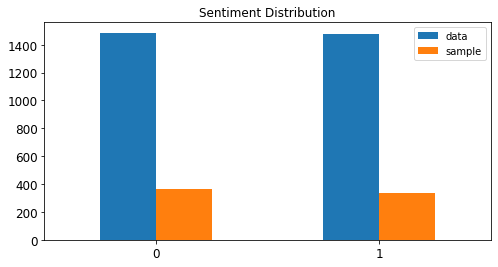

In [35]:
#show the sampling and actual data counts in a bar graph
sample_counts = sentiment_data_sample.score.value_counts()
actual_counts = sentiment_data_df.score.value_counts()

combined_data_frame = pd.DataFrame({'data': actual_counts,
                    'sample': sample_counts})

print(combined_data_frame.plot.bar(title = 'Sentiment Distribution', rot = 0, fontsize = 12, figsize = (8,4), tick_label = ['negative', 'positive']))

**Pie chart Vizualization**

In [36]:
labels = sentiment_data_df.source.value_counts().index
values = sentiment_data_df.source.value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

fig.update_layout(
    title=go.layout.Title(
        text="Sentences Source",
        xref="paper",
        x=0
    )
)

fig.show()

**Scatter plot Visualization**

In [37]:
#new data visualization
#show the relation between the word count in each sentence and what sentiment it is attached to
sentiment_data_sample_2 = sentiment_data_df.sample(n = 100)
x_axis_array = ["sentence_" + str(index) for index in sentiment_data_sample_2.index]

fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=x_axis_array, y=[len(sentence.split(' ')) for sentence in sentiment_data_sample_2.sentence],
                    mode='lines+markers',
                    name='Sentence Word Count'))

fig.add_trace(go.Scatter(x=x_axis_array, y=[score for score in sentiment_data_sample_2.score],
                    mode='lines+markers',
                    name='Sentence Score'))

fig.update_layout(
    title=go.layout.Title(
        text="Scatter Plot",
        xref="paper",
        x=0
    )
)

fig.show()

positive_sentences_array = [len(row.sentence.split(' ')) for index, row in sentiment_data_sample_2.iterrows() if row.score == '1']
print('Average word count in each positive sentence: ', sum(positive_sentences_array)/len(positive_sentences_array))

negative_sentences_array = [len(row.sentence.split(' ')) for index, row in sentiment_data_sample_2.iterrows() if row.score == '0']
print('Average word count in each negative sentence: ', sum(negative_sentences_array)/len(negative_sentences_array))


Average word count in each positive sentence:  12.774193548387096
Average word count in each negative sentence:  14.131578947368421


**Feature Creation**

Data frame with unigrams:

In [38]:
sentiment_data_df['unigrams'] = sentiment_data_df['sentence'].apply(lambda x: dmh.tokenize_text(x))

**Feature Subset Selection**

Document-Term matrix:

In [39]:
count_vect = CountVectorizer()
frequency_counts = count_vect.fit_transform(sentiment_data_df.sentence)
print("Document Term Matrix Size:", frequency_counts.shape)

Document Term Matrix Size: (2966, 5157)


**Heatmap visualization**

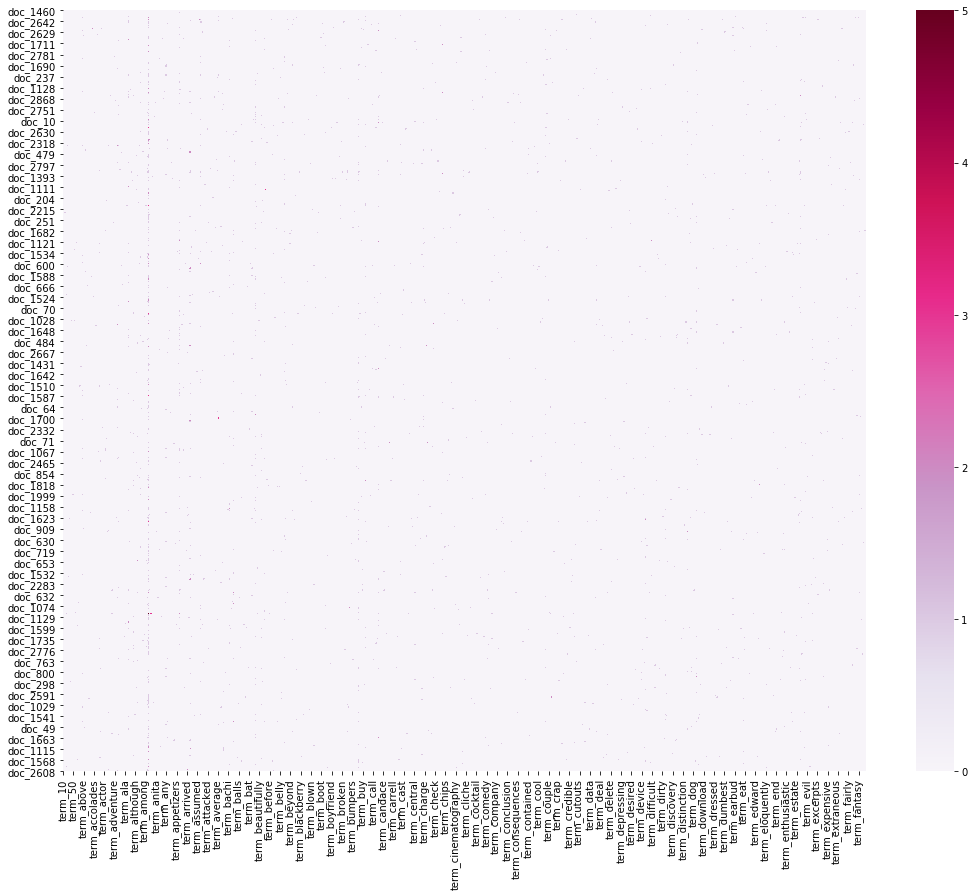

In [40]:
#heaptmap visualization
sample_count_vect = CountVectorizer()
sample_counts = sample_count_vect.fit_transform(sentiment_data_sample.sentence)
plot_x = ["term_"+str(i) for i in sample_count_vect.get_feature_names()[0:records]]
plot_y = ["doc_"+ str(i) for i in list(sentiment_data_sample.index)[:records]]
plot_z = sample_counts[0:records, 0:records].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(18, 14))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, annot=False)

**Dimensionality Reduction**

PCA with 2 components along with its scatter plot:

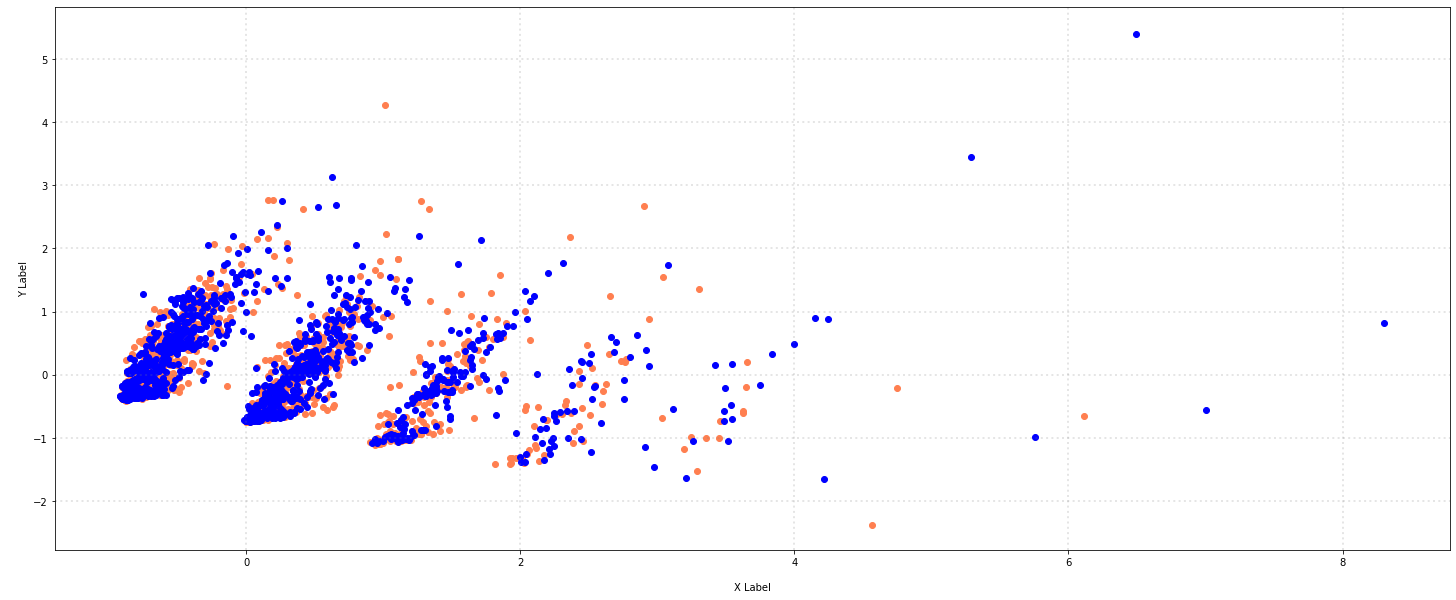

In [41]:
#2 dimension PCA
colors = ['coral', 'blue']
scores = ['0','1']

sentiment_data_reduced2 = PCA(n_components = 2).fit_transform(frequency_counts.toarray())

fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, score in zip(colors, scores):
    xs = sentiment_data_reduced2[sentiment_data_df['score'] == score].T[0]
    ys = sentiment_data_reduced2[sentiment_data_df['score'] == score].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

PCA with 3 components along with its scatter plot:

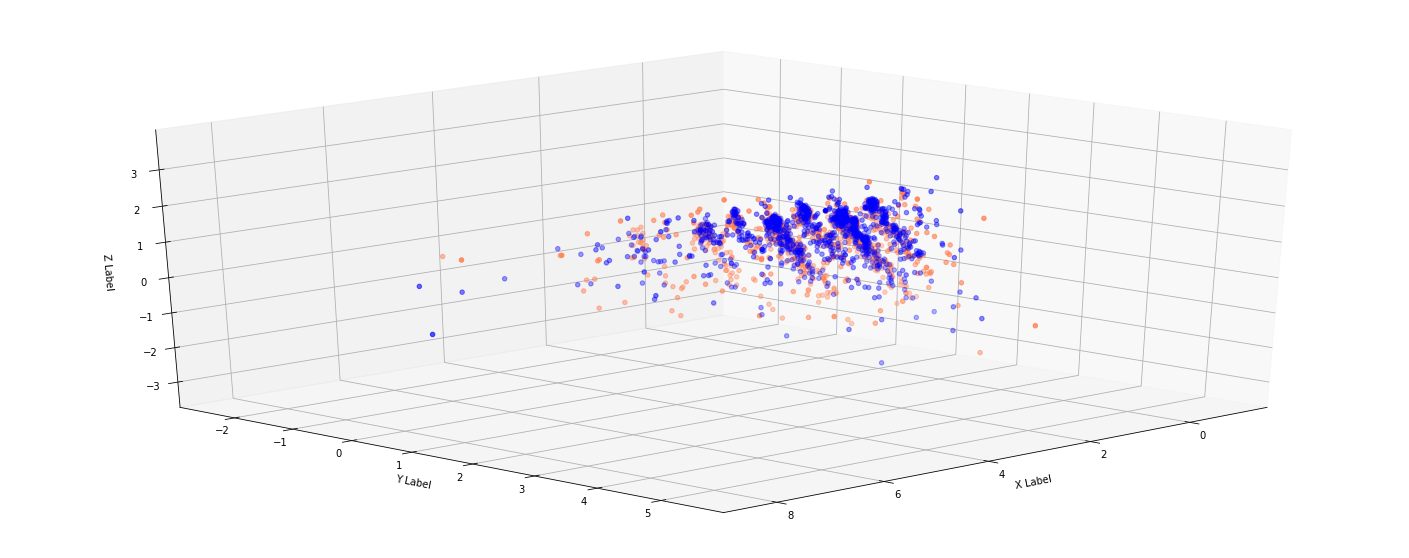

In [42]:
#3 dimension PCA
sentiment_data_reduced3 = PCA(n_components = 3).fit_transform(frequency_counts.toarray())
fig = plt.figure(figsize = (25,10))

ax1 = fig.add_subplot(1,1,1, projection='3d')

for c, score in zip(colors, scores):
    xs = sentiment_data_reduced3[sentiment_data_df['score'] == score].T[0]
    ys = sentiment_data_reduced3[sentiment_data_df['score'] == score].T[1]
    zs = sentiment_data_reduced3[sentiment_data_df['score'] == score].T[2]
    
    ax1.scatter3D(xs, ys, zs, c= c, marker = 'o')

ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')
ax1.view_init(25, 45)

plt.show()

**Attribute Transformation/Aggregation**

Creating an Array that contains the sum of the term frequencies for each word. Bar graph visualization (zoom for details).

In [43]:
#create a term frequencies array
term_frequencies = np.asarray(frequency_counts.sum(axis=0))[0]

data = go.Bar(x=["term_"+str(i) for i in count_vect.get_feature_names()],
            y=term_frequencies)

fig = go.Figure(data)

fig.update_layout(
    title=go.layout.Title(
        text="Term Frequencies",
        xref="paper",
        x=0
    )
)

fig.show()

Long-tailed distribution of term frequencies. Bar graph visualization, term frequencies in descending order (zoom for details).

In [44]:
#ordered term frequencies visualization
term_frequencies_df = pd.DataFrame({'terms': count_vect.get_feature_names(), 
                                            'counts': term_frequencies})
ordered_term_frequencies_df = term_frequencies_df.sort_values(by = 'counts', ascending = False)

ordered_data = go.Bar(x=["term_"+str(i) for i in ordered_term_frequencies_df['terms']],
            y=ordered_term_frequencies_df['counts'])

fig = go.Figure(ordered_data)

fig.update_layout(
    title=go.layout.Title(
        text="Ordered Term Frequencies",
        xref="paper",
        x=0
    )
)

fig.show()

**Binarization**

score column has only 2 possible values, so it makes more sence to apply binarization to the source parameter.

In [47]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(sentiment_data_df.source)
sentiment_data_df['bin_source'] = mlb.transform(sentiment_data_df['source']).tolist()

In [48]:
# print first 10 rows
sentiment_data_df[0:9]

,score,sentence,source,unigrams,bin_source
0,0,So there is no way for me to plug it in here i...,amazon,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]"
1,1,"Good case, Excellent value.",amazon,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
2,1,Great for the jawbone.,amazon,"[Great, for, the, jawbone, .]","[1, 0, 0]"
3,0,Tied to charger for conversations lasting more...,amazon,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]"
4,1,The mic is great.,amazon,"[The, mic, is, great, .]","[1, 0, 0]"
5,0,I have to jiggle the plug to get it to line up...,amazon,"[I, have, to, jiggle, the, plug, to, get, it, ...","[1, 0, 0]"
6,0,If you have several dozen or several hundred c...,amazon,"[If, you, have, several, dozen, or, several, h...","[1, 0, 0]"
7,1,If you are Razr owner...you must have this!,amazon,"[If, you, are, Razr, owner, ..., you, must, ha...","[1, 0, 0]"
8,0,"Needless to say, I wasted my money.",amazon,"[Needless, to, say, ,, I, wasted, my, money, .]","[1, 0, 0]"


Print the last 10 rows

In [49]:
sentiment_data_df[-10:]

,score,sentence,source,unigrams,bin_source
2956,0,The refried beans that came with my meal were ...,yelp,"[The, refried, beans, that, came, with, my, me...","[0, 0, 1]"
2957,0,Spend your money and time some place else.,yelp,"[Spend, your, money, and, time, some, place, e...","[0, 0, 1]"
2958,0,A lady at the table next to us found a live gr...,yelp,"[A, lady, at, the, table, next, to, us, found,...","[0, 0, 1]"
2959,0,the presentation of the food was awful.,yelp,"[the, presentation, of, the, food, was, awful, .]","[0, 0, 1]"
2960,0,I can't tell you how disappointed I was.,yelp,"[I, ca, n't, tell, you, how, disappointed, I, ...","[0, 0, 1]"
2961,0,I think food should have flavor and texture an...,yelp,"[I, think, food, should, have, flavor, and, te...","[0, 0, 1]"
2962,0,Appetite instantly gone.,yelp,"[Appetite, instantly, gone, .]","[0, 0, 1]"
2963,0,Overall I was not impressed and would not go b...,yelp,"[Overall, I, was, not, impressed, and, would, ...","[0, 0, 1]"
2964,0,"The whole experience was underwhelming, and I ...",yelp,"[The, whole, experience, was, underwhelming, ,...","[0, 0, 1]"
2965,0,"Then, as if I hadn't wasted enough of my life ...",yelp,"[Then, ,, as, if, I, had, n't, wasted, enough,...","[0, 0, 1]"


## 3. TF-IDF Matrix

In [50]:
#TF-IDF
tf_idf_vect = TfidfVectorizer()
tf_idf_counts = tf_idf_vect.fit_transform(sentiment_data_df.sentence)

print('First 10 Feature Names:', tf_idf_vect.get_feature_names()[0:10])
print('TF-IDF Matrix Size:', tf_idf_counts.shape)

First 10 Feature Names: ['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']
TF-IDF Matrix Size: (2966, 5157)


**TF IDF vs Term Frequency comparison visualization**

In [52]:
#visualize the 25 terms with the highest values in the TF-IDF Matrix and compare it with the highest values in the 
#Count Frequency Matrix
n = 25
term_tf_idf = np.asarray(tf_idf_counts.sum(axis=0))[0]
term_tf_idf_df = pd.DataFrame({'terms': tf_idf_vect.get_feature_names(), 
                                            'counts': term_tf_idf})
ordered_term_tf_idf_df = term_tf_idf_df.sort_values(by = 'counts', ascending = False)

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Bar(
            x=["term_"+str(i) for i in ordered_term_tf_idf_df['terms']][:n],
            y=ordered_term_tf_idf_df['counts'][:n],
            name = "TF-IDF"),            
            row=1, col=1
)


fig.add_trace(
    go.Bar(
            x=["term_"+str(i) for i in ordered_term_frequencies_df['terms'][:n]],
            y=ordered_term_frequencies_df['counts'][:n],
            name = "Word Counts"),            
            row=1, col=2
)

fig.update_layout(height=700, width=900, title_text="TF-IDF Ordered Data Terms vs Counts Ordered Data Terms")
fig.show()

### Naive Bayes Classifier

In [60]:
#Naive Bayes classifiers
#term frequency
mnb_term_frequency = MultinomialNB()
mnb_term_frequency.fit(frequency_counts, sentiment_data_df['score'].values)

#TF-IDF
mnb_tf_idf = MultinomialNB()
mnb_tf_idf.fit(tf_idf_counts, sentiment_data_df['score'].values)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

#### Accuracy Testing

In [65]:
#testing the accuracy
#test with a single random sentence from the data set
r_sentence = sentiment_data_df.sample(n = 1)
print('Sentence:',r_sentence.iloc[0].sentence,'\nReal Score:', r_sentence.iloc[0].score)
r_sentence_index = r_sentence.index[0]
print('Term Frequency MNB Prediction: ', mnb_term_frequency.predict(frequency_counts[r_sentence_index:r_sentence_index+1])[0])
print('TF-IDF MNB Prediction: ', mnb_tf_idf.predict(tf_idf_counts[r_sentence_index:r_sentence_index+1])[0])

Sentence: I vomited in the bathroom mid lunch. 
Real Score: 0
Term Frequency MNB Prediction:  0
TF-IDF MNB Prediction:  0


In [66]:
#obtain the accuracy of both models comparing the predicted values with the actual scores of all the sentences in the data set
total_sentences = len(sentiment_data_df)
tf_correct_prediction = 0
tf_idf_correct_prediction = 0
for index, row in sentiment_data_df.iterrows():

    tf_prediction = mnb_term_frequency.predict(frequency_counts[index:index+1])[0]
    if row.score == tf_prediction:
        tf_correct_prediction+=1
    
    tf_idf_prediction = mnb_tf_idf.predict(tf_idf_counts[index:index+1])[0]
    if row.score == tf_idf_prediction:
        tf_idf_correct_prediction+=1
    
print('Term Frequency MNB Prediction Accuracy: %.2f%%' % ((tf_correct_prediction/total_sentences)*100))
print('TF-IDF MNB Prediction Accuracy: %.2f%%' % ((tf_idf_correct_prediction/total_sentences)*100))


Term Frequency MNB Prediction Accuracy: 94.50%
TF-IDF MNB Prediction Accuracy: 95.28%


In [68]:
#testing with a sentences that are not in the dataset
negative_sentence = "I was very disappointed with the service"
n_word_freq = count_vect.transform([negative_sentence]).toarray()
n_word_tf_idf = tf_idf_vect.transform([negative_sentence]).toarray()
print('Term Frequency MNB Prediction for negative sentence: ', mnb_term_frequency.predict(n_word_freq[0:1])[0])
print('TF-IDF MNB Prediction for negative sentence: ', mnb_tf_idf.predict(n_word_tf_idf[0:1])[0])

positive_sentence = "Highly recommended, the service is very good"
p_word_freq = count_vect.transform([positive_sentence]).toarray()
p_word_tf_idf = tf_idf_vect.transform([positive_sentence]).toarray()
print('Term Frequency MNB Prediction for positive sentence: ', mnb_term_frequency.predict(p_word_freq[0:1])[0])
print('TF-IDF MNB Prediction for positive sentence: ', mnb_tf_idf.predict(p_word_tf_idf[0:1])[0])

Term Frequency MNB Prediction for negative sentence:  0
TF-IDF MNB Prediction for negative sentence:  0
Term Frequency MNB Prediction for positive sentence:  1
TF-IDF MNB Prediction for positive sentence:  1
